Columns in the dataset:
Index(['dteday', 'hr', 'casual', 'registered', 'temp_c', 'feels_like_c', 'hum',
       'windspeed', 'weathersit', 'season', 'holiday', 'workingday'],
      dtype='object')
Using target: workingday


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (8000, 427)                 │             855 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855 (3.34 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 855 (3.34 KB)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7752 - loss: 0.4373 - val_accuracy: 1.0000 - val_loss: 0.0109 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.7465e-04 - val_accuracy: 1.0000 - val_loss: 5.0903e-04 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.5597e-04 - val_accuracy: 1.0000 - val_loss: 2.6697e-04 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.0525e-04 - val_accuracy: 1.0000 - val_loss: 1.6003e-04 - learning_rate: 0.0010
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2343e-04 - val_accuracy: 1.0000 - val_loss: 1.0646e-04 - learning_rate: 0.0010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

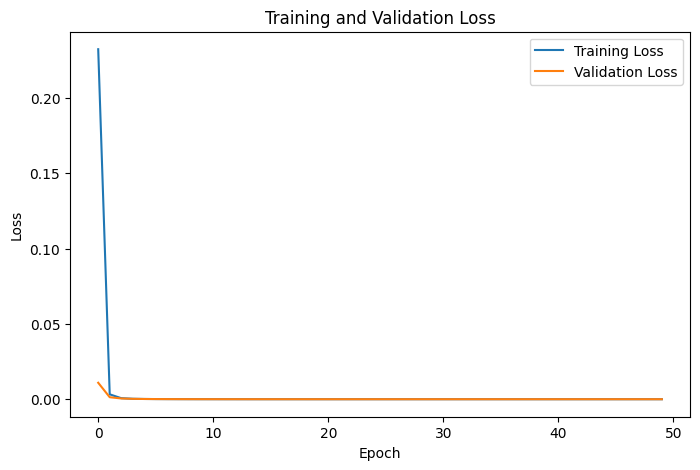

63/63 - 1s - 11ms/step - accuracy: 1.0000 - loss: 5.0336e-06
Test set Accuracy: 100.00%


In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Use nrows to load only a subset of the data (adjust the number as needed)
url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv'
bikes = pd.read_csv(url, nrows=10000)  # Load 10,000 rows instead of the entire dataset

# Print columns to verify
print("Columns in the dataset:")
print(bikes.columns)

# Use 'workingday' as the target variable
target = 'workingday'
print("Using target:", target)

# Separate features and labels
features = bikes.drop(columns=[target])
labels = bikes[target]

# Convert categorical features to dummy variables (this may increase memory usage, so only include needed features)
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a normalization layer for the features
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(X_train.values)

# Build the neural network model for binary classification
def build_model():
    model = keras.Sequential([
        normalizer,  # Normalize input features
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
    ])

    # Compile the model with binary crossentropy loss and accuracy as a metric
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

# Optional callback to reduce learning rate if validation loss plateaus
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)

# Train the model using a smaller batch size to reduce memory usage
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # Fewer epochs can help with memory usage during training
    validation_split=0.2,
    batch_size=32,  # Smaller batch size reduces memory requirements
    callbacks=[lr_callback],
    verbose=1
)

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test set Accuracy: {:5.2f}%".format(accuracy * 100))
